In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime, timedelta

In [3]:
import numpy as np
import pandas as pd

In [4]:
import xarray as xr; print(xr.__version__)

0.14.1


In [5]:
import dask

In [6]:
client = dask.distributed.Client()

/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [7]:
from dask.diagnostics import ProgressBar

In [8]:
client

Client Scheduler: tcp://127.0.0.1:35885 Dashboard: http://127.0.0.1:41449/status,Cluster Workers: 4 Cores: 12 Memory: 134.95 GB


In [9]:
import pathlib

In [10]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [11]:
HOME = pathlib.Path.home()

In [12]:
provider = 'JMA'

In [13]:
var_name = 'SST'

In [14]:
GCM = 'JMA'

In [15]:
dpath = HOME / 'research' / 'Smart_Ideas' / 'data' / 'GCMs' / 'NC' / GCM / var_name

In [16]:
dpath

PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST')

In [17]:
lfiles = list(dpath.glob("*seasonal.nc"))

In [18]:
lfiles.sort()

In [19]:
lfiles

[PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1979_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1980_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1981_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1982_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1983_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1984_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1985_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1986_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1987_JMA_seasonal.nc'),
 PosixPath('/home/nicolasf/research/S

In [20]:
lfiles[0]

PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_1979_JMA_seasonal.nc')

In [21]:
lfiles[-1]

PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST/SST_hindcasts_2014_JMA_seasonal.nc')

In [22]:
dset = xr.open_mfdataset(lfiles, combine='by_coords')

In [23]:
dset

<xarray.Dataset>
Dimensions:              (lat: 73, lon: 144, member: 5, step: 5, time: 432)
Coordinates:
  * step                 (step) int64 3 4 5 6 7
  * lat                  (lat) float64 -90.0 -87.5 -85.0 ... 85.0 87.5 90.0
  * member               (member) int64 0 1 2 3 4
  * lon                  (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                 (time) datetime64[ns] 1979-01-01 ... 2014-12-01
Data variables:
    sst                  (time, step, member, lat, lon) float64 dask.array<chunksize=(12, 5, 5, 73, 144), meta=np.ndarray>
    init_dates_JMA       (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
    forecast_valid_time  (time, step) datetime64[ns] dask.array<chunksize=(12, 5), meta=np.ndarray>
Attributes:
    history:  Mon Nov 25 14:36:02 2019: ncrename -d longitude,lon -d latitude...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [24]:
dpath_update = HOME / 'research' /'Smart_Ideas' / 'data' / 'GCMs' / 'NC' / GCM / '2015_2019' / var_name

In [25]:
dset.time[-1]

<xarray.DataArray 'time' ()>
array('2014-12-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2014-12-01

In [26]:
lfiles_updates = list(dpath_update.glob("*.nc"))

In [27]:
lfiles_updates.sort()

In [28]:
lfiles_updates

[PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/2015_2019/SST/JMA_SST_2015.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/2015_2019/SST/JMA_SST_2016.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/2015_2019/SST/JMA_SST_2017.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/2015_2019/SST/JMA_SST_2018.nc'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/2015_2019/SST/JMA_SST_2019.nc')]

In [31]:
dset_update = xr.open_mfdataset(lfiles_updates, combine='by_coords')

In [32]:
dset_update

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, step: 3, time: 59)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * step     (step) int64 1 2 3
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2019-11-01
Data variables:
    SST      (time, step, lat, lon) float64 dask.array<chunksize=(12, 3, 73, 144), meta=np.ndarray>

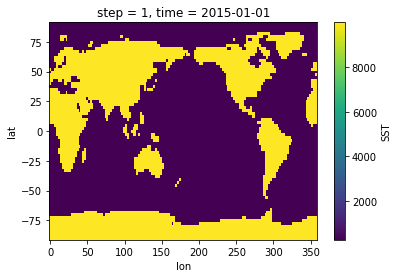

In [33]:
dset_update['SST'][0,0,:,:].plot()

In [34]:
dset_update['SST'].max().compute()

<xarray.DataArray 'SST' ()>
array(9999.)

In [35]:
dset_update['SST'] = xr.where((dset_update['SST'] == 9999.), np.NaN, dset_update['SST'])

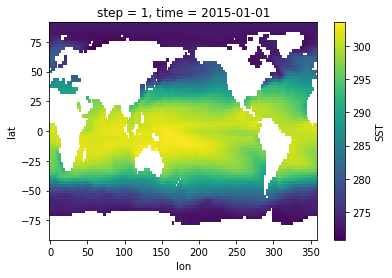

In [36]:
dset_update['SST'][0,0,:,:].plot()

In [37]:
dset_update = dset_update.mean('step', keep_attrs=True)

In [38]:
dset_update

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 59)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2019-11-01
Data variables:
    SST      (time, lat, lon) float64 dask.array<chunksize=(12, 73, 144), meta=np.ndarray>

In [39]:
# dset_update['step']  = (('step'), [3])

In [40]:
dset = dset.mean('member')

In [41]:
dset_update = dset_update.rename({var_name: var_name.lower()})

In [42]:
dset_update

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 59)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2019-11-01
Data variables:
    sst      (time, lat, lon) float64 dask.array<chunksize=(12, 73, 144), meta=np.ndarray>

In [43]:
shape = dset_update[var_name.lower()].shape

In [44]:
shape

(59, 73, 144)

In [45]:
dset = dset.sel(step=3)

In [46]:
dset = dset.drop('step')

In [47]:
dset_update

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 59)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2019-11-01
Data variables:
    sst      (time, lat, lon) float64 dask.array<chunksize=(12, 73, 144), meta=np.ndarray>

In [48]:
dset_concat = xr.concat([dset, dset_update], dim='time')

In [49]:
dset_concat.time[0]

<xarray.DataArray 'time' ()>
array('1979-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1979-01-01

In [50]:
dset_concat.time[-1]

<xarray.DataArray 'time' ()>
array('2019-11-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2019-11-01

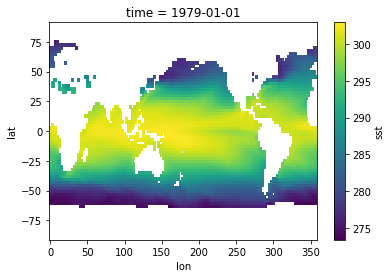

In [51]:
dset_concat[var_name.lower()][0,:,:].plot()

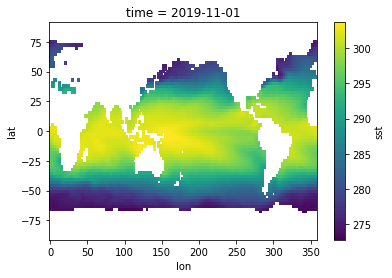

In [52]:
dset_concat[var_name.lower()][-1,:,:].plot()

### calculates the climatology 

In [53]:
clim = dset_concat.sel(time=slice('1993','2016'))

In [54]:
len(clim.time)

288

In [55]:
(2016 - 1993 + 1) * 12

288

In [56]:
clim = clim.groupby(clim.time.dt.month).mean()

In [57]:
clim

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, month: 12)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lat, lon) float64 dask.array<chunksize=(1, 73, 144), meta=np.ndarray>

In [58]:
clim_path = dpath / 'CLIMATOLOGY'

In [59]:
if not clim_path.exists(): 
    clim_path.mkdir(parents=True)

In [60]:
clim.to_netcdf(clim_path / f"CLIMATOLOGY_{var_name}_{GCM}_1993_2016.nc")

### calculates the anomalies 

In [61]:
dset_concat

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 491)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-11-01
Data variables:
    sst      (time, lat, lon) float64 dask.array<chunksize=(12, 73, 144), meta=np.ndarray>

In [62]:
anoms = dset_concat.groupby(dset_concat.time.dt.month) - clim

In [63]:
anoms

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 491)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-11-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 ... 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    sst      (time, lat, lon) float64 dask.array<chunksize=(1, 73, 144), meta=np.ndarray>

In [64]:
from dateutil.relativedelta import relativedelta

In [65]:
time = anoms.time.to_series()

In [66]:
forecast_valid_time = [x + relativedelta(months=3) for x in time]

In [67]:
forecast_valid_time = np.array(forecast_valid_time)

In [68]:
forecast_valid_time.reshape(-1,1).shape

(491, 1)

In [69]:
anoms['step'] = (('step'), [3])

In [70]:
anoms['forecast_valid_time'] = (('time','step'), forecast_valid_time.reshape(-1,1))

In [71]:
anoms

<xarray.Dataset>
Dimensions:              (lat: 73, lon: 144, step: 1, time: 491)
Coordinates:
  * lat                  (lat) float64 -90.0 -87.5 -85.0 ... 85.0 87.5 90.0
  * lon                  (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                 (time) datetime64[ns] 1979-01-01 ... 2019-11-01
    month                (time) int64 1 2 3 4 5 6 7 8 9 ... 3 4 5 6 7 8 9 10 11
  * step                 (step) int64 3
Data variables:
    sst                  (time, lat, lon) float64 dask.array<chunksize=(1, 73, 144), meta=np.ndarray>
    forecast_valid_time  (time, step) datetime64[ns] 1979-04-01 ... 2020-02-01

In [72]:
anoms[var_name.lower()].data.shape

(491, 73, 144)

In [73]:
shape = anoms[var_name.lower()].data.shape

In [74]:
anoms[var_name.lower()] = (('time','step','lat','lon'), anoms[var_name.lower()].data.reshape(shape[0], 1, *shape[1:]))

In [75]:
anoms

<xarray.Dataset>
Dimensions:              (lat: 73, lon: 144, step: 1, time: 491)
Coordinates:
  * lat                  (lat) float64 -90.0 -87.5 -85.0 ... 85.0 87.5 90.0
  * lon                  (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                 (time) datetime64[ns] 1979-01-01 ... 2019-11-01
    month                (time) int64 1 2 3 4 5 6 7 8 9 ... 3 4 5 6 7 8 9 10 11
  * step                 (step) int64 3
Data variables:
    sst                  (time, step, lat, lon) float64 dask.array<chunksize=(1, 1, 73, 144), meta=np.ndarray>
    forecast_valid_time  (time, step) datetime64[ns] 1979-04-01 ... 2020-02-01

## saves in netcdf with pattern: 
    
```
{var_name}_hindcasts_YYYY_M~GCM~_seasonal_interp.nc
```

In [76]:
dpath

PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/JMA/SST')

In [77]:
for t in range(len(anoms.time)): 
    sub = anoms.isel(time=t)
    year = sub.time.dt.year.data.flatten()[0]
    month = sub.time.dt.month.data.flatten()[0]
    print(f"{var_name}_hindcasts_{year}_{month}_{GCM}_seasonal_anomalies_interp.nc") 
    sub.to_netcdf(dpath / f"{var_name}_hindcasts_{year}_{month}_{GCM}_seasonal_anomalies_interp.nc")
    sub.close()

SST_hindcasts_1979_1_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1979_2_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1979_3_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1979_4_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1979_5_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1979_6_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1979_7_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1979_8_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1979_9_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1979_10_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1979_11_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1979_12_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1980_1_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1980_2_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1980_3_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1980_4_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1980_5_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1980_6_JMA_seasonal_anomalies_interp.nc
SST_hindcasts_1980_7_JMA_